<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Unsupervised Learning with KMeans

In this tutorial, we'll analyse shoppers at a shopping mall, and try group the customers into categories. We'll do this with KMeans.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shoppers_df = pd.read_csv('../../Data/Mall_Customers.csv')
shoppers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


For each customer we know their:

* Age
* Sex
* Annual income in thousands of dollars (k$)
* Spending Score (1-100), this is a measure of how much they spend shopping at the mall.

We won't be using the CustomerID, so we should drop it immediately. 

In [3]:
shoppers_df = shoppers_df.drop('CustomerID', axis=1)
shoppers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18



There are 2 questions we're going to try to answer.

1. "How many clusters of customers are there?"
2. "Which customers belong to each cluster?"

Since we're doing Unsupervised learning, we don't know the answer to these questions for any of the customers. In other words, our data is unlabelled. 

KMeans is good at determining which observations belong to each cluster. The hard bit is trying to determine the correct number of clusters. 

Let's simplify the problem somewhat, and imagine that we only have 2 features of data. 

* Annual Income (k$)
* Spending Score (1-100)

Now let's plot these two variables on a scatter chart...


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

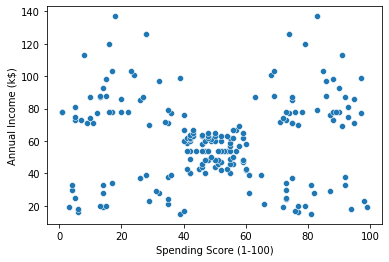

In [8]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=shoppers_df)

Looking at the data, I reckon there are 5 clusters, so let's plug k=5 into our model, and see how well it fares. 

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=5)

In [15]:
X = shoppers_df[['Spending Score (1-100)', 'Annual Income (k$)']].values

Remember that there is no "y"; i.e. We don't have a target value in Unsupervised learning. 

In [16]:
kmeans.fit(X)  # remember no y because this is unsupervised learning

KMeans(n_clusters=5)

In [17]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

So how would our model label the data? 

In [18]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Remember that you can't score this because you don't know what the correct labels should be!

But it can be useful to visualise the data to see what it looks like.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

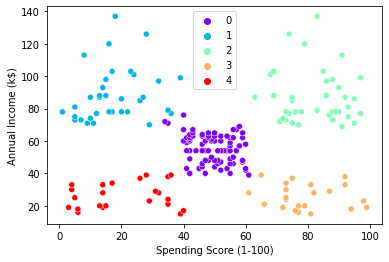

In [19]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=shoppers_df, hue=kmeans.labels_, palette='rainbow')

## How does KMeans work?

* Choose a number of Clusters "K" (we'll discuss how to choose K later)
* Randomly assign each point to a cluster
* Until the clusters stop changing, repeat the following:  
  * For each cluster compute the cluster centroid by taking the mean vector of points in the cluster
  * Re-assign each point to the cluster for which the centroid is closest

If you want to know more check out [StatQuest: K-Means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)

## Choosing K

In the example above we were able to choose a good value of K by creating a 2-dimensional scatter chart, then "eyeballing it" to choose a good value of K. In practice there's often no easy answer for choosing the best K. 

Often times, domain knowledge will determine the best value for K.

Another strategy is to use the Elbow Method.


# The Elbow Method

In this section, we'll use the Elbow Method to choose the optimum number of clusters

* The Elbow Method uses the Sum of Squared Error (SSE) for different values of K
* SSE is the sum of the squared distance between each member of the cluster and its centroid. 
* plot K against SSE
    * SSE decreases as K gets larger
    * look for the point at which the SSE decreases abruptly. 
    * this produces an "elbow effect" in the graph. 



In [14]:
clusters = list(range(1,11)) 
inertia = []

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 

**Intertia** is also known as the "within cluster sum-of-squares", it's a way of measuring how good the groupings are.

It is calculated by measuring the distances between each point and it's centroid. Smaller values for intertia equate to a tigher groupings.

Let's plot the intertias for different values of K.

<AxesSubplot:>

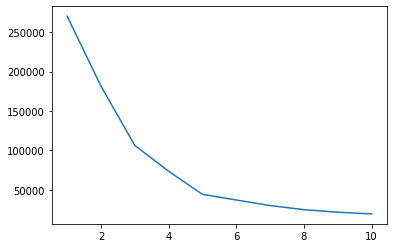

In [15]:
sns.lineplot(x=clusters, y=inertia)

Looking at this graph, the elbow occurs at 5, so K should be 5. 

You might think that because 10 has a lower intertia, it would be a better choice. Actually no, as we increase k we end up with too many groupings. This is "overfitting" our model to our data. The Elbow Method that k=5 gives us the best balance between underfitting and overfitting. 

# Part 2 : KMeans with 4 dimensions

In this section we're going to try KMeans on all 4 dimensions of data at our desposal. 



In [20]:
shoppers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Start by making gender into a number column

In [21]:
# make gender into 0=Male, 1=Female
shoppers_df['Gender'] = shoppers_df['Gender'].str.replace('Male', '0')
shoppers_df['Gender'] = shoppers_df['Gender'].str.replace('Female', '1')
shoppers_df['Gender'] = pd.to_numeric(shoppers_df['Gender'] )
shoppers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [22]:
X = shoppers_df.values

In [23]:
clusters = list(range(1,11))
inertia = []

for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) 
    # intertia is also known as the "within cluster sum-of-squares". 
    # intertia is calculated by measuring the square of the distance between each point and the centroid of its cluster.
    # low inertia means we have tight groupings (this is good)

<AxesSubplot:>

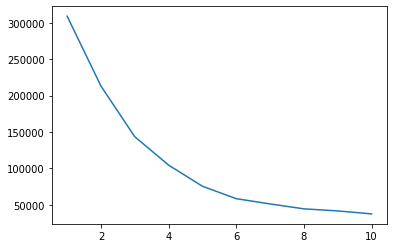

In [24]:
sns.lineplot(x=clusters, y=inertia)

What is the optimum number of clusters?

According to the Elbow method, I'd choose K=6. 

Now let's fit the data to the model. 

In [25]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

Can we plot 4 dimensions in a chart? 

Actually, yes we can! Let's have an interactive 3d chart using Plotly.

x = Annual Income (k$)
y = Spending Score (1=100)
z = Age
shape = gender (circles for male, diamonds for female) 
color = cluster

In [27]:
import plotly.express as px

fig = px.scatter_3d(shoppers_df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age',
              color=kmeans.labels_, symbol='Gender')
fig.update_layout(
    autosize=False,
    width=1600,
    height=800,)
fig.show()

I'm sure you'll agree that this is really cool!

And you can use the chart to verify that 6 clusters actually do make sense. 


# T-SNE

Let's build on the last example. Would you have been able to use the KMeans model with additional features of data? 

Hopefully, the answer is yes, although I think we have to concede that we really were pushing the limits of how many features you could visualise. 

This is a great time to introduce T-SNE.

T-SNE stands for t-disributed stochastic neighbor embedding. 

It's a useful tool for visualising higher dimensional data in 2 or 3 dimensions. 

While distortion is inevitable, t-sne does a good job of representing the distances between the samples.


In [28]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=200)       # vary the learning rate between 50-200 to get good groupings on the chart.

tsne_features = model.fit_transform(X) # note that there aren't separate fit() and transform() functions. 
tsne_features

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



array([[  1.4456077 ,  -9.764502  ],
       [  9.13989   , -12.208989  ],
       [ -0.73665917, -10.973182  ],
       [  9.132264  , -11.748295  ],
       [  1.0928344 ,  -9.564889  ],
       [  9.059899  , -11.596917  ],
       [ -1.292273  , -10.7188425 ],
       [  8.8489    , -12.886492  ],
       [ -2.9105344 ,  -9.954058  ],
       [  8.750811  , -11.118778  ],
       [ -2.9001088 ,  -9.462236  ],
       [  8.850918  , -13.363309  ],
       [ -2.4185526 ,  -9.45109   ],
       [  8.560838  , -11.755396  ],
       [ -1.0843887 , -10.3217    ],
       [  8.605316  , -12.0204    ],
       [  0.58546925,  -9.413914  ],
       [  8.661771  , -10.74079   ],
       [ -1.2458478 ,  -8.794415  ],
       [  8.570133  , -13.389685  ],
       [  0.52443063,  -9.2833395 ],
       [  8.225406  , -11.307738  ],
       [ -1.8981233 , -10.336067  ],
       [  8.112823  , -11.030787  ],
       [ -2.0535457 ,  -9.58439   ],
       [  7.9887824 , -12.136885  ],
       [ -0.41946578,  -8.696394  ],
 

T-SNE has taken the 4 features and distilled them down to 2 dimensions that we can easily plot. 

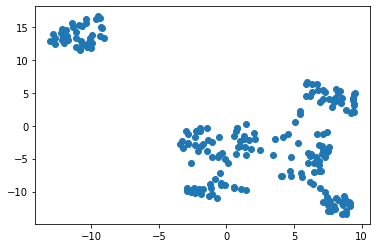

In [29]:
xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

plt.scatter(xs, ys)

## Conclusion: 

* The axis on the chart above have no discernable meaning. 
* Running the T-SNE again will generate a new chart with a different shape - but similar groupings.


## Deciding the correct number of Clusters
Thinking back to our shoppers, would you be inclined to say there are 6 groupings (or clusters) in the chart above? 

When we used Plotly to produce the interactive 3d chart, it was just about possible to represent the 4 dimensions of data on one chart, in order to confirm that the 6 clusters seemed reasonable. 

Can you see how this technique could be useful when dealing with even higher dimensions of data? 

Finally, shall we superimpose our KMeans labels on the T-SNE chart? 

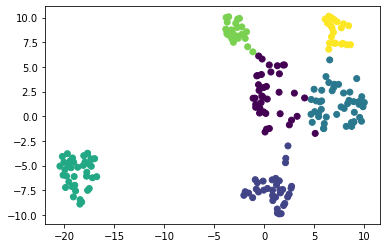

In [77]:
plt.scatter(xs, ys, c=kmeans.labels_)

As you can see T-SNE makes it easy to visualise data in higher dimensions. By reducing the 4 dimensions of data we gave as input, and outputting 2 dimensions we were able to plot the data and see the groupings. 

This is an example of "dimension reduction". 